In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [51]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

soup = BeautifulSoup(html_data_2, "html.parser")
tables = pd.read_html(html_data_2)

tables = pd.read_html(html_data_2)
gme_revenue = tables[1].copy()

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r"[\$,]","", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] !=""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype("int64")

gme_revenue.tail()

C:\Users\pkati\AppData\Local\Temp\ipykernel_20588\1914954599.py:5: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

C:\Users\pkati\AppData\Local\Temp\ipykernel_20588\1914954599.py:7: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [47]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

tables = pd.read_html(html_data_2)
print(len(tables))
print(tables[0].head())
print(tables[1].head())

6
   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364  
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2020-04-30   
1                                    2020-01-31   
2                                    2019-10-31   
3                                    2019-07-31   
4                                    2019-04-30   

  GameStop Quarterly Revenue (Millions of US $).1  
0                                          $1,021 

C:\Users\pkati\AppData\Local\Temp\ipykernel_20588\1674703736.py:4: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [19]:
gme = yf.Ticker("GME")
gme_data = gme.history(period = "max")
gme_data.reset_index(inplace = True)

In [43]:
from plotly.subplots import make_subplots
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

def make_graph (stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes = True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing= 0.3
    )
    #stock price trace
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data["Date"]),
            y=stock_data["Close"].astype("float"),
            name="Share Price"
        ),
        row=1, col=1
    )
                                         
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data["Date"]),
            y=revenue_data["Revenue"].astype("float"),
            name="Revenue"
        ),
        row=2, col=1
    )
    #axis labels
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US Millions)", row=1, col=1)
    fig.update_yaxes(title_text="Price ($US Millions)", row=2, col=1)

    #layout
    fig.update_layout(
        showlegend = False,
        height = 900,
        title = stock,
        xaxis_rangeslider_visible = True
    )
    fig.show()

In [35]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


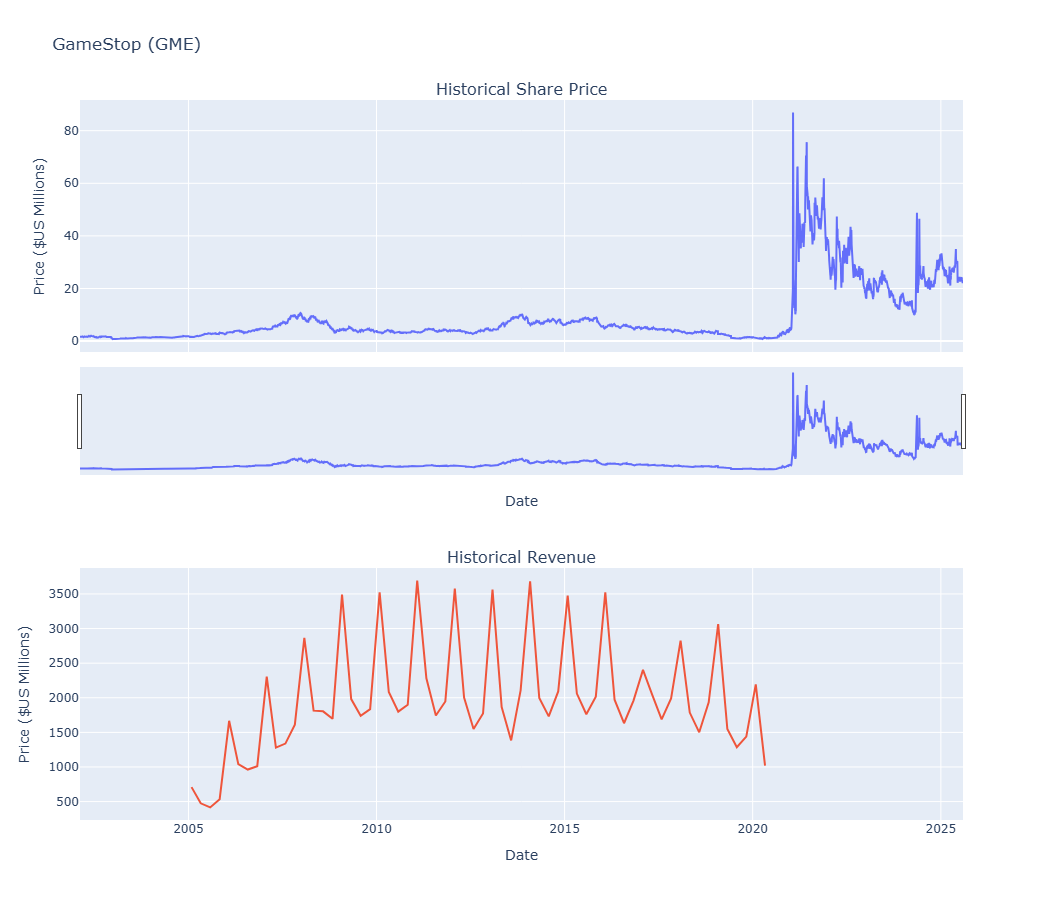

In [45]:
make_graph(gme_data, gme_revenue, "GameStop (GME)")